In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#import graphviz
#from sklearn.tree import convert_to_graphviz


%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("train.csv")  

df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

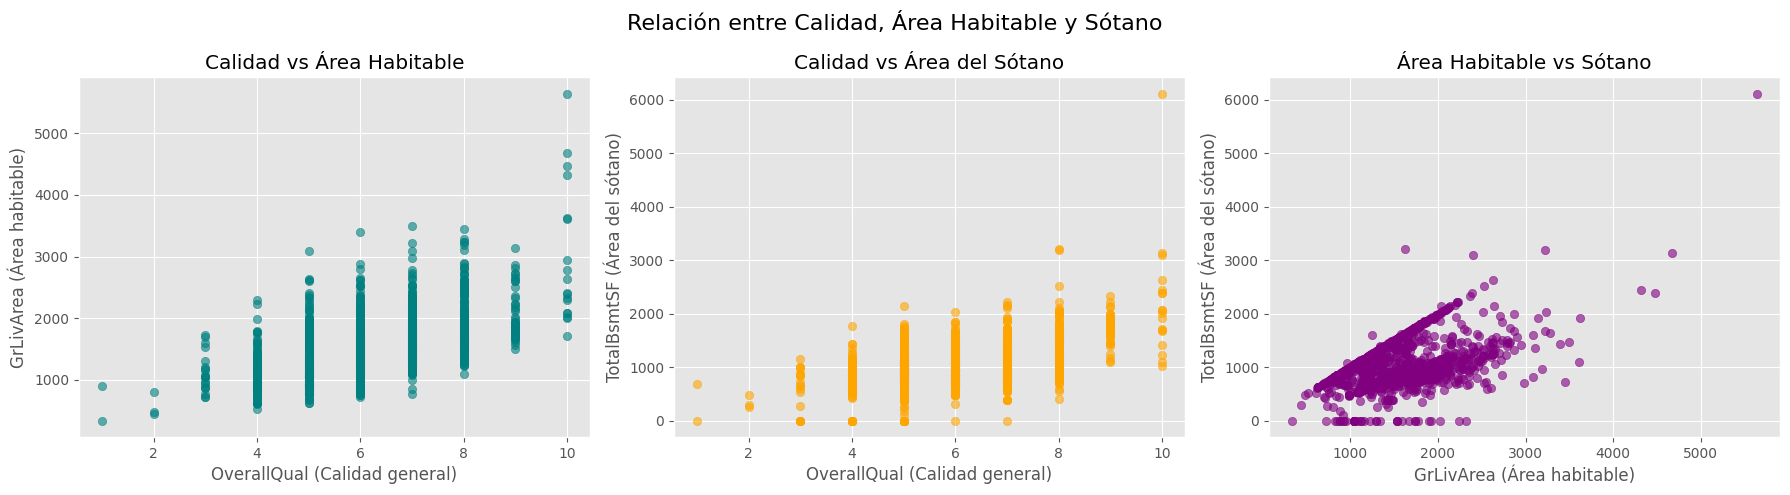

In [3]:
df_clean = df.dropna(subset=['OverallQual', 'GrLivArea', 'TotalBsmtSF'])

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relación entre Calidad, Área Habitable y Sótano', fontsize=16)

# Gráfico 1: Calidad general vs Área habitable
axs[0].scatter(df_clean['OverallQual'], df_clean['GrLivArea'], c='teal', alpha=0.6)
axs[0].set_xlabel('OverallQual (Calidad general)')
axs[0].set_ylabel('GrLivArea (Área habitable)')
axs[0].set_title('Calidad vs Área Habitable')

# Gráfico 2: Calidad general vs Área de sótano
axs[1].scatter(df_clean['OverallQual'], df_clean['TotalBsmtSF'], c='orange', alpha=0.6)
axs[1].set_xlabel('OverallQual (Calidad general)')
axs[1].set_ylabel('TotalBsmtSF (Área del sótano)')
axs[1].set_title('Calidad vs Área del Sótano')

# Gráfico 3: Área habitable vs Área de sótano
axs[2].scatter(df_clean['GrLivArea'], df_clean['TotalBsmtSF'], c='purple', alpha=0.6)
axs[2].set_xlabel('GrLivArea (Área habitable)')
axs[2].set_ylabel('TotalBsmtSF (Área del sótano)')
axs[2].set_title('Área Habitable vs Sótano')

plt.tight_layout()
plt.show()

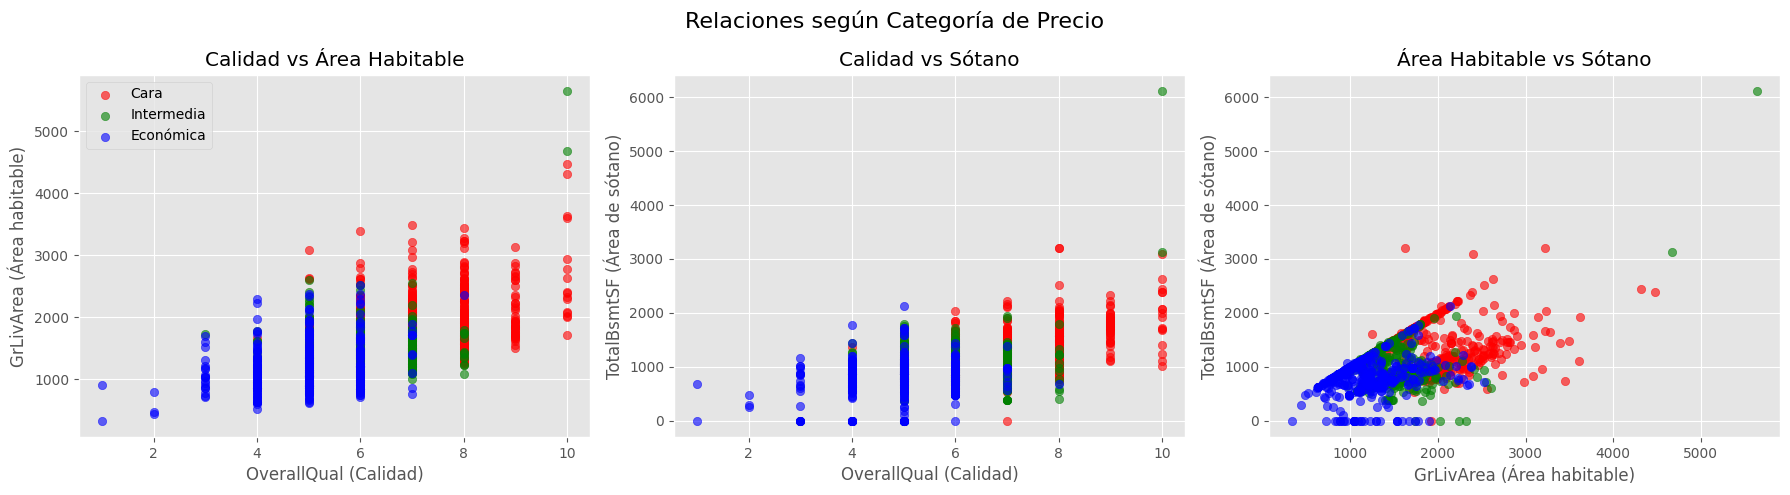

In [4]:

df_clean = df.dropna(subset=['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'SalePrice'])

precio_33 = np.percentile(df_clean['SalePrice'], 33)
precio_66 = np.percentile(df_clean['SalePrice'], 66)

def categorizar_precio(precio):
    if precio <= precio_33:
        return 'Económica'
    elif precio <= precio_66:
        return 'Intermedia'
    else:
        return 'Cara'

df_clean['PriceCategory'] = df_clean['SalePrice'].apply(categorizar_precio)


price_colors = {
    'Económica': 'blue',
    'Intermedia': 'green',
    'Cara': 'red'
}

# Crear figura y subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relaciones según Categoría de Precio', fontsize=16)

# Gráfico 1: Calidad vs Área habitable
for cat in df_clean['PriceCategory'].unique():
    subset = df_clean[df_clean['PriceCategory'] == cat]
    axs[0].scatter(subset['OverallQual'], subset['GrLivArea'],
                   label=cat, color=price_colors[cat], alpha=0.6)
axs[0].set_xlabel('OverallQual (Calidad)')
axs[0].set_ylabel('GrLivArea (Área habitable)')
axs[0].set_title('Calidad vs Área Habitable')
axs[0].legend()

# Gráfico 2: Calidad vs Área del sótano
for cat in df_clean['PriceCategory'].unique():
    subset = df_clean[df_clean['PriceCategory'] == cat]
    axs[1].scatter(subset['OverallQual'], subset['TotalBsmtSF'],
                   label=cat, color=price_colors[cat], alpha=0.6)
axs[1].set_xlabel('OverallQual (Calidad)')
axs[1].set_ylabel('TotalBsmtSF (Área de sótano)')
axs[1].set_title('Calidad vs Sótano')

# Gráfico 3: Área habitable vs Área del sótano
for cat in df_clean['PriceCategory'].unique():
    subset = df_clean[df_clean['PriceCategory'] == cat]
    axs[2].scatter(subset['GrLivArea'], subset['TotalBsmtSF'],
                   label=cat, color=price_colors[cat], alpha=0.6)
axs[2].set_xlabel('GrLivArea (Área habitable)')
axs[2].set_ylabel('TotalBsmtSF (Área de sótano)')
axs[2].set_title('Área Habitable vs Sótano')

plt.tight_layout()
plt.show()


In [5]:

precio_33 = np.percentile(df['SalePrice'], 33)
precio_66 = np.percentile(df['SalePrice'], 66)

def categorizar_precio(precio):
    if precio <= precio_33:
        return 'Económica'
    elif precio <= precio_66:
        return 'Intermedia'
    else:
        return 'Cara'

df['PriceCategory'] = df['SalePrice'].apply(categorizar_precio)


In [6]:
nombre_numericas = ['GrLivArea', 'TotalBsmtSF', 'OverallQual']
nombre_categoricas = ['Neighborhood', 'HouseStyle']

df_modelo = df.dropna(subset=nombre_numericas + nombre_categoricas + ['PriceCategory'])

X = df_modelo[nombre_categoricas + nombre_numericas]
y = df_modelo['PriceCategory']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")


preprocesador = ColumnTransformer([
    ("cat", categorical_preprocessor, nombre_categoricas),
    ("num", numeric_preprocessor, nombre_numericas)
])


In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

modelo = make_pipeline(preprocesador, SVC(kernel="linear"))


modelo.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood',
                                                   'HouseStyle']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['GrLivArea', 'TotalBsmtSF',
                                                   'OverallQual'])])),
                ('svc', SVC(kernel='linear'))])

In [9]:
from sklearn import metrics

y_pred = modelo.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))


Accuracy: 0.7744874715261959
Precision: 0.7757215787007867
Recall: 0.7744874715261959


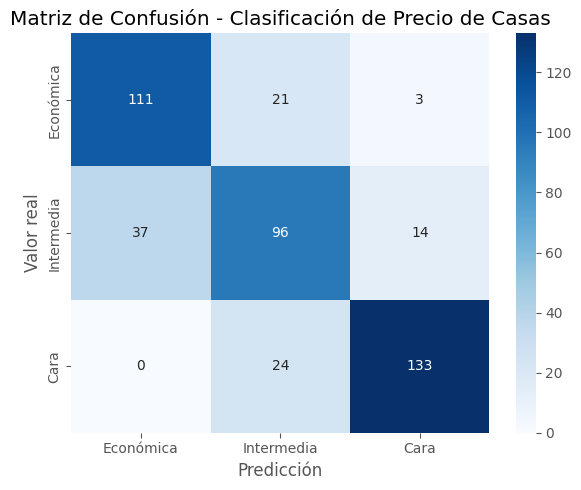

In [10]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, y_pred, labels=["Económica", "Intermedia", "Cara"])


plt.figure(figsize=(6, 5))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Económica", "Intermedia", "Cara"], 
            yticklabels=["Económica", "Intermedia", "Cara"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Clasificación de Precio de Casas")
plt.tight_layout()
plt.show()


# Utilizando otros parametros

In [11]:

# Modelo 1: RBF kernel
modelo_rbf = make_pipeline(preprocesador, SVC(kernel='rbf', C=10, gamma=0.01))
modelo_rbf.fit(X_train, y_train)
pred_rbf = modelo_rbf.predict(X_test)

# Modelo 2: Sigmoid kernel
modelo_sigmoid = make_pipeline(preprocesador, SVC(kernel='sigmoid', C=1, gamma=0.001))
modelo_sigmoid.fit(X_train, y_train)
pred_sigmoid = modelo_sigmoid.predict(X_test)

# Modelo 3: Polynomial kernel
modelo_poly = make_pipeline(preprocesador, SVC(kernel='poly', C=5, degree=3, gamma='scale'))
modelo_poly.fit(X_train, y_train)
pred_poly = modelo_poly.predict(X_test)


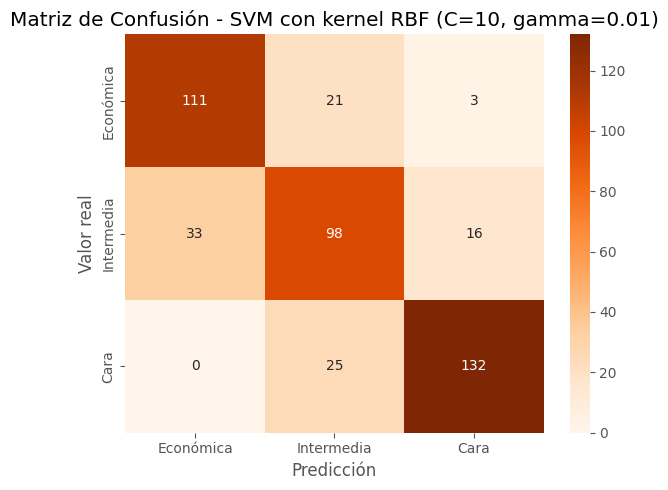

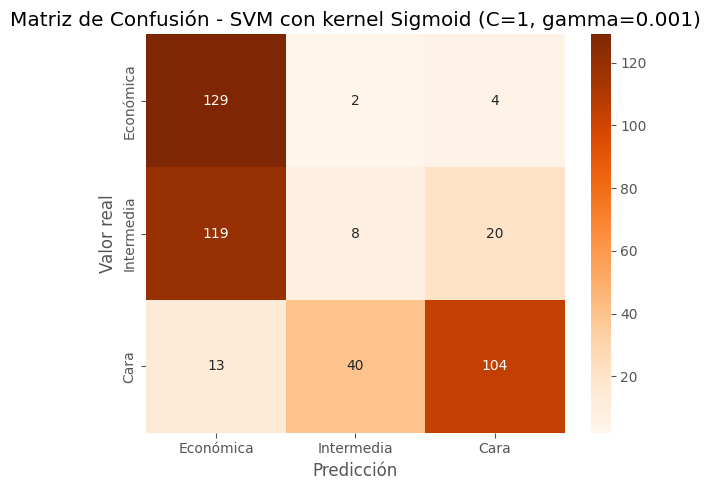

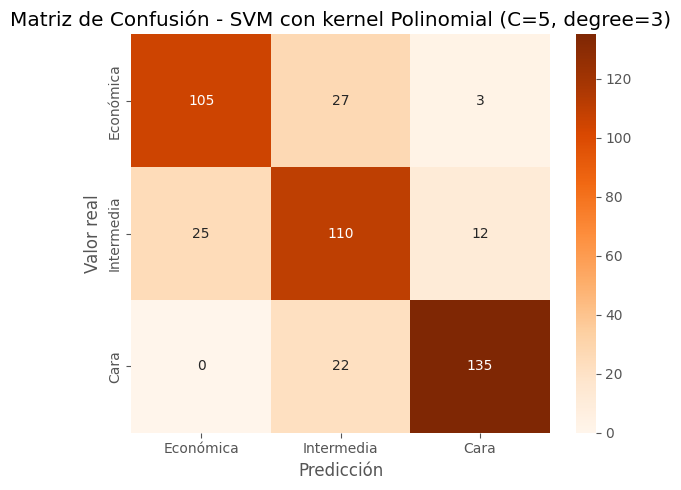

In [12]:

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["Económica", "Intermedia", "Cara"])
    plt.figure(figsize=(6, 5))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=["Económica", "Intermedia", "Cara"],
                yticklabels=["Económica", "Intermedia", "Cara"])
    plt.title(f"Matriz de Confusión - {title}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor real")
    plt.tight_layout()
    plt.show()


plot_confusion(y_test, pred_rbf, "SVM con kernel RBF (C=10, gamma=0.01)")
plot_confusion(y_test, pred_sigmoid, "SVM con kernel Sigmoid (C=1, gamma=0.001)")
plot_confusion(y_test, pred_poly, "SVM con kernel Polinomial (C=5, degree=3)")


In [21]:
from sklearn.metrics import classification_report, accuracy_score

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"\n Resultados para: {nombre_modelo}")
    print("-" * 40)
    print(f" Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Económica", "Intermedia", "Cara"]))

# Evaluar cada modelo
evaluar_modelo(y_test, pred_rbf, "SVM con kernel RBF (C=10, gamma=0.01)")
evaluar_modelo(y_test, pred_sigmoid, "SVM con kernel Sigmoid (C=1, gamma=0.001)")
evaluar_modelo(y_test, pred_poly, "SVM con kernel Polinomial (C=5, degree=3)")


 Resultados para: SVM con kernel RBF (C=10, gamma=0.01)
----------------------------------------
 Accuracy: 0.7768

Classification Report:
              precision    recall  f1-score   support

   Económica       0.87      0.84      0.86       157
  Intermedia       0.77      0.82      0.80       135
        Cara       0.68      0.67      0.67       147

    accuracy                           0.78       439
   macro avg       0.78      0.78      0.78       439
weighted avg       0.78      0.78      0.78       439


 Resultados para: SVM con kernel Sigmoid (C=1, gamma=0.001)
----------------------------------------
 Accuracy: 0.5490

Classification Report:
              precision    recall  f1-score   support

   Económica       0.81      0.66      0.73       157
  Intermedia       0.49      0.96      0.65       135
        Cara       0.16      0.05      0.08       147

    accuracy                           0.55       439
   macro avg       0.49      0.56      0.49       439
weighted 

In [16]:
from sklearn.metrics import accuracy_score

# Predecir sobre el set de entrenamiento
train_pred_linear = modelo.predict(X_train)
train_acc_linear = accuracy_score(y_train, train_pred_linear)
test_pred_linear = modelo.predict(X_test)
test_acc_linear = accuracy_score(y_test, test_pred_linear)

print(f"Train Accuracy (Linear): {train_acc_linear:.4f}")
print(f"Test Accuracy (Linear): {test_acc_linear:.4f}")


Train Accuracy (Linear): 0.8286
Test Accuracy (Linear): 0.7745


Un rendimiento estable, aunque algo más bajo que otros kernels más complejos. El modelo generaliza razonablemente bien, sin señales evidentes de sobreajuste.

In [23]:
# Evaluar en el conjunto de entrenamiento para comparar
pred_rbf_train = modelo_rbf.predict(X_train)
pred_sigmoid_train = modelo_sigmoid.predict(X_train)
pred_poly_train = modelo_poly.predict(X_train)

# Comparación
print("=== Evaluación en entrenamiento ===")
evaluar_modelo(y_train, pred_rbf_train, "Entrenamiento - SVM RBF")
evaluar_modelo(y_train, pred_sigmoid_train, "Entrenamiento - SVM Sigmoid")
evaluar_modelo(y_train, pred_poly_train, "Entrenamiento - SVM Polinomial")

print("=== Evaluación en prueba ===")
evaluar_modelo(y_test, pred_rbf, "Prueba - SVM RBF")
evaluar_modelo(y_test, pred_sigmoid, "Prueba - SVM Sigmoid")
evaluar_modelo(y_test, pred_poly, "Prueba - SVM Polinomial")


=== Evaluación en entrenamiento ===

 Resultados para: Entrenamiento - SVM RBF
----------------------------------------
 Accuracy: 0.8306

Classification Report:
              precision    recall  f1-score   support

   Económica       0.87      0.91      0.89       340
  Intermedia       0.85      0.85      0.85       348
        Cara       0.76      0.73      0.74       333

    accuracy                           0.83      1021
   macro avg       0.83      0.83      0.83      1021
weighted avg       0.83      0.83      0.83      1021


 Resultados para: Entrenamiento - SVM Sigmoid
----------------------------------------
 Accuracy: 0.5788

Classification Report:
              precision    recall  f1-score   support

   Económica       0.78      0.68      0.72       340
  Intermedia       0.55      0.96      0.70       348
        Cara       0.22      0.08      0.11       333

    accuracy                           0.58      1021
   macro avg       0.51      0.57      0.51      1021
w

RBF y Polinomial son opciones sólidas. Sigmoid se confirma como la menos eficaz.

In [24]:
from sklearn.model_selection import cross_val_score

print("=== Validación cruzada ===")
for nombre, modelo in [
    ("SVM RBF", modelo_rbf),
    ("SVM Sigmoid", modelo_sigmoid),
    ("SVM Polinomial", modelo_poly)
]:
    scores = cross_val_score(modelo, X, y, cv=5, scoring="accuracy")
    print(f"{nombre}: Precisión media = {scores.mean():.4f}, Desviación estándar = {scores.std():.4f}")


=== Validación cruzada ===
SVM RBF: Precisión media = 0.8041, Desviación estándar = 0.0149
SVM Sigmoid: Precisión media = 0.7432, Desviación estándar = 0.0092
SVM Polinomial: Precisión media = 0.7945, Desviación estándar = 0.0238


La RBF es el kernel más robusto y consistente en validación cruzada, lo que refuerza su valor como candidato confiable.

In [25]:
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}

grid_modelo = make_pipeline(preprocesador, SVC(kernel='rbf'))
grid = GridSearchCV(grid_modelo, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor precisión:", grid.best_score_)

# Evaluamos en prueba con el mejor modelo
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
evaluar_modelo(y_test, y_pred_best, "SVM RBF con GridSearch")


Mejores parámetros: {'svc__C': 100, 'svc__gamma': 0.1}
Mejor precisión: 0.8011860353897656

 Resultados para: SVM RBF con GridSearch
----------------------------------------
 Accuracy: 0.7813

Classification Report:
              precision    recall  f1-score   support

   Económica       0.87      0.88      0.87       157
  Intermedia       0.76      0.81      0.79       135
        Cara       0.70      0.65      0.67       147

    accuracy                           0.78       439
   macro avg       0.78      0.78      0.78       439
weighted avg       0.78      0.78      0.78       439



Mejores hiperparámetros: C = 100, gamma = 0.1

Accuracy en prueba: 0.7813

Macro F1-score: 0.78

Resultados muy similares a los obtenidos sin GridSearch, lo cual valida la elección original del kernel RBF.

El uso de GridSearch mejora ligeramente el desempeño del modelo RBF, confirmando que está bien afinado y es una buena elección para este problema.

                      feature  importance
17  cat__Neighborhood_OldTown    1.635211
33             num__GrLivArea    1.309011
35           num__OverallQual    1.255303
18    cat__Neighborhood_SWISU    1.047008
8   cat__Neighborhood_Gilbert    1.007096
21  cat__Neighborhood_Somerst    0.893516
5   cat__Neighborhood_CollgCr    0.856311
31     cat__HouseStyle_SFoyer    0.854775
29     cat__HouseStyle_2.5Unf    0.839450
24  cat__Neighborhood_Veenker    0.768041


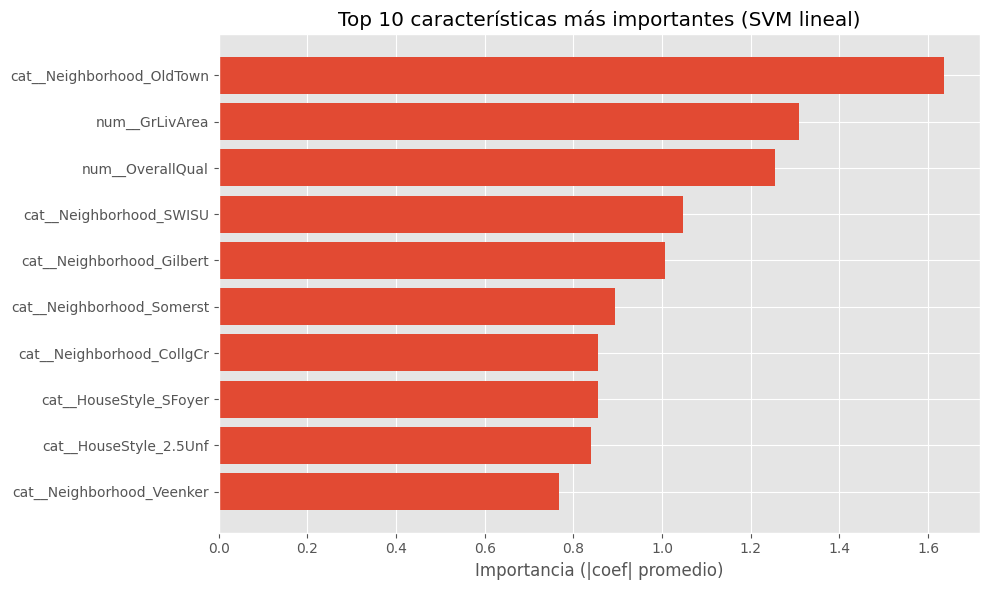

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes entrenado tu modelo lineal (modelo_lineal)

# Extraer coeficientes y convertir a array denso si es sparse
coef = modelo_lineal.named_steps['svc'].coef_
if hasattr(coef, "toarray"):  # si es sparse
    coef = coef.toarray()

# Obtener nombres de características
feature_names = modelo_lineal.named_steps['columntransformer'].get_feature_names_out()

# Calcular importancia media (magnitud absoluta promedio) de los coeficientes
importances = np.mean(np.abs(coef), axis=0)

# Crear un DataFrame para visualizar mejor
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Mostrar los 10 más importantes
print(importance_df.head(10))

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(10)['feature'], importance_df.head(10)['importance'])
plt.xlabel("Importancia (|coef| promedio)")
plt.title("Top 10 características más importantes (SVM lineal)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


El vecindario es la categoría dominante: 6 de las 10 variables más importantes están relacionadas con el vecindario, lo cual indica que la ubicación es un factor clave para este modelo.

Tamaño y calidad también importan: El área habitable y la calidad general de la casa tienen un peso importante, lo que es esperable en tareas de predicción de clase (precio o categoría de vivienda).
